# Imports

In [7]:
import glob
import os

import pandas as pd
import scanpy as sc
import seaborn as sns

In [8]:
from nb_utils import describe

from celltype_utils import get_shared_adata
from path_constants import sig_outdir_base, FIGURE_FOLDER

## Figure folder

In [9]:
figure_folder = os.path.join(FIGURE_FOLDER, 'unaligned_kmers')
! mkdir -p $figure_folder

## Read one2one h5ad

In [10]:
adata = get_shared_adata()

/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [13]:
adata

View of AnnData object with n_obs × n_vars = 89795 × 10560
    obs: 'index', 'age', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'free_annotation', 'individual', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'tissue', 'narrow_group', 'broad_group', 'compartment_group', 'compartment_narrow', 'channel_cleaned', 'batch', 'n_genes', 'n_counts', 'species_batch_v2', 'compartment_broad', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'common_individual_id'
    var: 'bat__gene_name', 'mouse_lemur__gene_name-bat', 'mouse__gene_name-bat', 'mouse_lemur__gene_name_x-hlm', 'mouse__gene_name_x-hlm', 'gene_ids-lemur-hlm', 'n_cells-mouse-hlm', 'mouse_lemur__gene_name_y-hlm', 'mouse__gene_name_y-hlm'

# Read parquet files

## File paths

In [12]:
sketch_id = "alphabet-dayhoff__ksize-51__scaled-10"


parquets = glob.glob(
    os.path.join(
        sig_outdir_base,
        "*",
        "2--single-cell-kmers",
        sketch_id,
        "hash2kmer__unique_kmers_per_celltype.parquet",
    )
)
parquets

['/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse--to-publish/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/4--test-lemur/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/1--train-mouse/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet']

### Bat

In [14]:
bat_parquet = [x for x in parquets if 'bat' in x][0]
bat_parquet

'/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet'

In [15]:
bat = pd.read_parquet(bat_parquet)
describe(bat)

(69988437, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,PRPGRPPPAATVWFLSI,bdbbdbbbbbbeffebe,459880203121538048,E00512:367:HWHJNCCXY:1:2217:9516:30175\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IPTDPAPKAHPGPRRAN,ebbcbbbdbdbbbddbc,210410082269031083,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
2,FGAGSVGIAAGAGTIIH,fbbbbebebbbbbbeed,1384284221265406607,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,VGIAAGAGTIIHDKHRS,ebebbbbbbeedcdddb,446503280445862484,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,SGQGLWVLLQELGPLSM,bbcbefeeeccebbebe,697450965653291028,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


### Human

In [17]:
human_parquet = [x for x in parquets if 'human' in x][0]
human_parquet

'/home/olga/data_lg/data_sm_copy/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet'

In [18]:
human = pd.read_parquet(human_parquet)
describe(human)

(33366578, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


In [19]:
bat.groupby('broad_group').cell_id.nunique()

broad_group
Alveolar Epithelial Type 2          832
B cell                              165
Capillary                          2214
Dendritic                            98
Fibroblast                         1382
Macrophage                         1196
Monocyte                            969
Natural Killer T cell               351
Smooth Muscle and Myofibroblast     120
T cell                              376
Name: cell_id, dtype: int64

In [20]:
human.groupby('broad_group').cell_id.nunique()

broad_group
Alveolar Epithelial Type 2         3150
B cell                              174
Capillary                          2093
Dendritic                           438
Fibroblast                          725
Macrophage                         3356
Monocyte                            752
Natural Killer T cell               224
Smooth Muscle and Myofibroblast     587
T cell                             2655
Name: cell_id, dtype: int64

In [21]:
bat.groupby('broad_group').apply(lambda x: x.hashval.nunique()/x.cell_id.nunique())

broad_group
Alveolar Epithelial Type 2         3511.283654
B cell                             2674.539394
Capillary                          1390.377597
Dendritic                          6382.326531
Fibroblast                         1567.082489
Macrophage                         1992.954013
Monocyte                           2309.285862
Natural Killer T cell              2838.341880
Smooth Muscle and Myofibroblast    4045.616667
T cell                             2232.808511
dtype: float64

In [22]:
bat_unaligned = bat.query('alignment_status == "unaligned"')
bat_unaligned.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,PRPGRPPPAATVWFLSI,bdbbdbbbbbbeffebe,459880203121538048,E00512:367:HWHJNCCXY:1:2217:9516:30175\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IPTDPAPKAHPGPRRAN,ebbcbbbdbdbbbddbc,210410082269031083,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
2,FGAGSVGIAAGAGTIIH,fbbbbebebbbbbbeed,1384284221265406607,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,VGIAAGAGTIIHDKHRS,ebebbbbbbeedcdddb,446503280445862484,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,SGQGLWVLLQELGPLSM,bbcbefeeeccebbebe,697450965653291028,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


In [23]:
bat_aligned = bat.query('alignment_status == "aligned"')
describe(bat_aligned)

(66637862, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,LGVWLTYRYRNQKDPLS,ebefebfdfdccdcbeb,1071395202532925770,E00512:367:HWHJNCCXY:1:1205:4229:18766\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
1,GNLVVESPRSNQLSHLG,bceeecbbdbccebdeb,964549883818904234,E00512:367:HWHJNCCXY:1:1120:29954:49197\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
2,SNQLSHLGGSSAQGAIF,bccebdebbbbbcbbef,1434265734909814491,E00512:367:HWHJNCCXY:1:1120:29954:49197\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
3,NQLSHLGGSSAQGAIFN,ccebdebbbbbcbbefc,141337536592772060,E00512:367:HWHJNCCXY:1:1120:29954:49197\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
7,DLQQVAGSAARSQDALS,ceccebbbbbdbccbeb,1389938289591061387,E00512:367:HWHJNCCXY:1:1101:8623:34711\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast


In [24]:
bat_aligned.dtypes

kmer_in_sequence      object
kmer_in_alphabet      object
hashval               object
read_name             object
gene_name             object
species               object
cell_id               object
sketch_id             object
moltype               object
ksize                 object
scaled                 int64
alignment_status      object
broad_group         category
dtype: object

In [25]:
bat_hashval_to_ncells = bat_aligned.groupby(['hashval', 'broad_group']).cell_id.nunique()
bat_hashval_to_ncells.name = 'n_cells_bat'
bat_hashval_to_ncells.head()

hashval              broad_group               
1000000127429088155  Alveolar Epithelial Type 2    0
                     B cell                        0
                     Capillary                     1
                     Dendritic                     0
                     Fibroblast                    0
Name: n_cells_bat, dtype: int64

In [26]:
bat_unaligned.dtypes

kmer_in_sequence      object
kmer_in_alphabet      object
hashval               object
read_name             object
gene_name             object
species               object
cell_id               object
sketch_id             object
moltype               object
ksize                 object
scaled                 int64
alignment_status      object
broad_group         category
dtype: object

In [27]:
bat_unaligned_hashes = set(bat_unaligned.hashval)
len(bat_unaligned_hashes)

1480071

In [28]:
human.hashval = human.hashval.astype(str)

In [29]:
human.hashval.dtypes

dtype('O')

In [30]:
%%time

human_hashvals_bat_unaligned = human.query(
    "hashval in @bat_unaligned_hashes"
)
describe(human_hashvals_bat_unaligned)

(8003714, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
20,DTYTLPRLNQEEVESLN,cbfbebdeccccecbec,1361709410904674137,A00111:155:HFCWYDMXX:1:2227:29803:12649\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,SDPLELVVSGAAETLSP,bcbeceeebbbbcbebb,444799571023784058,A00111:155:HFCWYDMXX:1:1483:10710:10864\tCB:Z:...,None,human,P3_2__CGAGAAGTCGTTGACA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte
2,ISNFSKVSGYKINVQKS,ebcfbdebbfdececdb,859122113661270444,A00111:155:HFCWYDMXX:2:1410:28583:22091\tCB:Z:...,None,human,P3_4__CCCATACTCCACGCAG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Alveolar Epithelial Type 2
3,NFSKVSGYKINVQKSQA,cfbdebbfdececdbcb,270327790717497491,A00111:155:HFCWYDMXX:2:1410:28583:22091\tCB:Z:...,None,human,P3_4__CCCATACTCCACGCAG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Alveolar Epithelial Type 2
7,VTDQVEVNAQNSVPDEE,ebccececbccbebccc,393741197327423913,A00111:155:HFCWYDMXX:2:1221:25301:13401\tCB:Z:...,None,human,P3_4__TACGGATCATTGGCGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Smooth Muscle and Myofibroblast


CPU times: user 23.5 s, sys: 6.57 s, total: 30.1 s
Wall time: 30 s


In [31]:
human_hashvals_bat_unaligned_gene_names = human_hashvals_bat_unaligned.groupby('broad_group').gene_name.value_counts()
human_hashvals_bat_unaligned_gene_names.name = 'n_hashes'
human_hashvals_bat_unaligned_gene_names = human_hashvals_bat_unaligned_gene_names.reset_index()
describe(human_hashvals_bat_unaligned_gene_names)

(33379, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
0,Alveolar Epithelial Type 2,SFTPC,22832
1,Alveolar Epithelial Type 2,EEF1G,17923
2,Alveolar Epithelial Type 2,EDF1,16938
3,Alveolar Epithelial Type 2,SSR4,14306
4,Alveolar Epithelial Type 2,MGST3,13645


### Read bat unannotated genes

In [32]:
bat_unannotated = pd.read_csv('/home/olga/data_lg/data_sm_copy/immune-evolution/databases/unannotated-genes-in-bat-compared-to-human-GRCh38/unannotated_gene_in_bat_compared_to_GRCH38p13.csv')
bat_unannotated = bat_unannotated.dropna(how='all', axis=1)
bat_unannotated = {k: v for k, v in bat_unannotated.iteritems()}
# print(bat_unannotated.shape)
# bat_unannotated.head()
bat_unannotated.keys()

dict_keys(['ISG', 'receptor_ligand', 'antivirals', 'IG', 'unannotated_all'])

In [33]:
dfs = []

for gene_category, gene_names in bat_unannotated.items():
#     print(f'--- {gene_category} ---')
    df = human_hashvals_bat_unaligned_gene_names.query('gene_name in @gene_names')
    df['gene_category'] = gene_category
    dfs.append(df)
bat_unaligned_in_human = pd.concat(dfs)
describe(bat_unaligned_in_human)


(2593, 4)
--- First 5 entries ---


/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,broad_group,gene_name,n_hashes,gene_category
826,Alveolar Epithelial Type 2,CASP4,209,ISG
1005,Alveolar Epithelial Type 2,CAPN2,133,ISG
1546,Alveolar Epithelial Type 2,GBP1,41,ISG
1934,Alveolar Epithelial Type 2,PARP14,20,ISG
2834,Alveolar Epithelial Type 2,GBP2,4,ISG


In [34]:
bat_unaligned_in_human.to_csv(
    os.path.join(figure_folder, "bat_unaligned_in_human.csv"), index=False
)

In [35]:
bat_unaligned_in_human.query('gene_category == "ISG" and broad_group == "Alveolar Epithelial Type 2"')

,broad_group,gene_name,n_hashes,gene_category
826,Alveolar Epithelial Type 2,CASP4,209,ISG
1005,Alveolar Epithelial Type 2,CAPN2,133,ISG
1546,Alveolar Epithelial Type 2,GBP1,41,ISG
1934,Alveolar Epithelial Type 2,PARP14,20,ISG
2834,Alveolar Epithelial Type 2,GBP2,4,ISG
3285,Alveolar Epithelial Type 2,GBP3,2,ISG
3309,Alveolar Epithelial Type 2,IFITM1,2,ISG
3690,Alveolar Epithelial Type 2,GBP4,1,ISG
3739,Alveolar Epithelial Type 2,IFITM2,1,ISG
3740,Alveolar Epithelial Type 2,IFITM3,1,ISG


In [36]:
bat_unaligned_in_human_n_genes = bat_unaligned_in_human.groupby(['gene_category', 'broad_group']).size()
bat_unaligned_in_human_n_genes.name = 'n_genes'
bat_unaligned_in_human_n_genes = bat_unaligned_in_human_n_genes.reset_index()
bat_unaligned_in_human_n_genes = bat_unaligned_in_human_n_genes.sort_values(['gene_category', 'n_genes'], ascending=False)
bat_unaligned_in_human_n_genes

,gene_category,broad_group,n_genes
35,unannotated_all,Macrophage,352
30,unannotated_all,Alveolar Epithelial Type 2,294
39,unannotated_all,T cell,258
34,unannotated_all,Fibroblast,250
32,unannotated_all,Capillary,244
38,unannotated_all,Smooth Muscle and Myofibroblast,232
33,unannotated_all,Dendritic,217
36,unannotated_all,Monocyte,207
31,unannotated_all,B cell,142
37,unannotated_all,Natural Killer T cell,111


## Celltype palette

In [37]:
celltype_palette = dict(
    zip(
        sorted(bat_unaligned_in_human_n_genes.broad_group.unique()),
        sns.color_palette("Dark2", n_colors=10),
    ),
)

### one plot per category

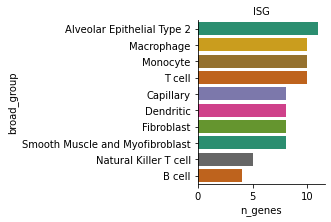

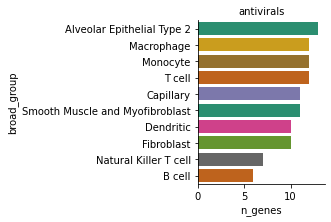

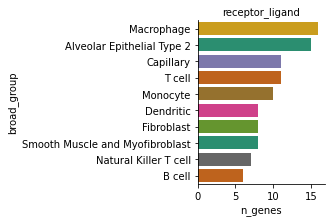

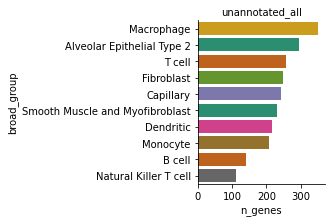

In [38]:
for gene_group, df in bat_unaligned_in_human_n_genes.groupby("gene_category"):
    df = df.sort_values("n_genes", ascending=False)
    g = sns.catplot(
        y="broad_group",
        x="n_genes",
        col="gene_category",
        sharex=False,
        data=df,
        order=df.broad_group,
        palette=celltype_palette,
        kind="bar",
        height=3,
        aspect=1.5,
        #     sharey=False,
    )
    g.set_titles("{col_name}")
    pdf = os.path.join(figure_folder, f'barplot__unannotated_genes_found_in_unaligned_kmers__{gene_group}.pdf')
    g.savefig(pdf)
    png = pdf.replace('.pdf', '.png')
    g.savefig(png)